## OCR/Tersseract

We will search a word in 6 different images. If the word appears in the image, we will display the faces that appear in that image.

In [1]:
from zipfile import ZipFile
from PIL import Image, ImageDraw, ImageFont
import pytesseract as pyt
import cv2 as cv
import numpy as np


# loading the face detection classifier
face_cascade = cv.CascadeClassifier('opencv/data/haarcascades_cuda/haarcascade_frontalface_default.xml')

pages = ["npr1.png", "npr2.png", "npr3.png", "npr4.png", "npr5.png", "npr6.png"]

word_face_match = []
faces = [] 


In [2]:
#get words on each image, and see if any words match with users input
def get_words(pages, match_list, search):
    for page in pages:
        img=Image.open(page)
        text = pyt.image_to_string(img)
        words = text.split()
        for word in words:
            if word.lower() == search.lower() and word not in match_list:
                match_list.append(page)
                
    return match_list 

In [20]:

#take matched images, and display the faces that appear on the image
def get_faces(pages, match_list, face_list):
    for page in pages:
        cropped_faces = []
        if page in match_list:
            img=Image.open(page)
            np_img = np.array(img)
            gray = cv.cvtColor(np_img, cv.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray)

            for face in faces:
                cropped = img.crop((face[0],face[1],face[0]+face[2],face[1]+face[3]))
                cropped_faces.append(cropped)
            
            if len(cropped_faces) > 0:
                canvas = Image.new(cropped_faces[0].mode, (cropped_faces[0].width *5, cropped_faces[0].height *2))
    
                x=0
                y=0
                color = 0
                img_width = int(cropped_faces[0].width)
                img_height = int(cropped_faces[0].height)
            
                for cropped_face in cropped_faces:
                    cropped_face = cropped_face.resize((img_width, img_height))
                    canvas.paste(cropped_face, (x,y))
                    if x + img_width == canvas.width:
                        x=0
                        y+=img_height
                    else:
                        x+=img_width
                print(page)
                display(canvas)
            else:
                print(page)
            print("No faces in this file\n")
                
        else:
            print(page)
            print("No faces in this file\n")
            


What word do you want to search? music
npr1.png


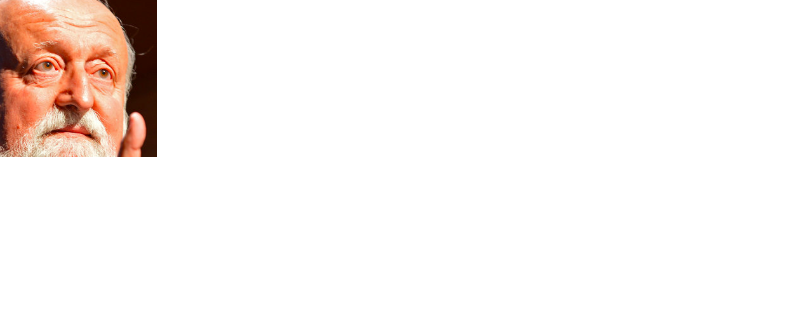

No faces in this file

npr2.png
No faces in this file

npr3.png
No faces in this file

npr4.png
No faces in this file

npr5.png
No faces in this file

npr6.png


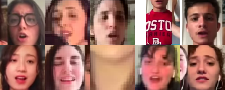

No faces in this file



In [21]:
response = input("What word do you want to search? ")
get_words(pages,word_face_match, response)
get_faces(pages, word_face_match, faces)
